In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

# Goal:
**Find targets for transit search**

I have downloaded all source within 50arcmin radius of the North and South Ecliptic Poles. Fully continous coverage occurs for sources within about 23arcmin (47arcmin FOV).

Many are of course giants/AGB or galaxies/AGN, since WISE. My thought is we want to search all plausible dwarfs

In [2]:
colnames = ['designation', 'ra', 'dec', 'sigra', 'sigdec', 'sigradec', 'glon', 'glat', 'elon', 'elat', 'wx', 'wy', 
            'w1mpro', 'w1sigmpro', 'w1snr', 'w1rchi2', 'w2mpro', 'w2sigmpro', 'w2snr', 'w2rchi2', 
            'w3mpro', 'w3sigmpro', 'w3snr', 'w3rchi2', 'w4mpro', 'w4sigmpro', 'w4snr', 'w4rchi2', 
            'rchi2', 'nb', 'na', 'w1sat', 'w2sat', 'w3sat', 'w4sat', 'satnum', 'ra_pm', 'dec_pm', 
            'sigra_pm', 'sigdec_pm', 'sigradec_pm', 'pmra', 'sigpmra', 'pmdec', 'sigpmdec', 'w1rchi2_pm', 
            'w2rchi2_pm', 'w3rchi2_pm', 'w4rchi2_pm', 'rchi2_pm', 'pmcode', 'cc_flags', 'ext_flg', 'var_flg', 
            'ph_qual', 'det_bit', 'moon_lev', 'w1nm', 'w1m', 'w2nm', 'w2m', 'w3nm', 'w3m', 'w4nm', 'w4m', 
            'w1cov', 'w2cov', 'w3cov', 'w4cov', 'tmass_key', 'r_2mass', 'pa_2mass', 'n_2mass', 'j_m_2mass', 
            'j_msig_2mass', 'h_m_2mass', 'h_msig_2mass', 'k_m_2mass', 'k_msig_2mass', 'dist', 'angle']

NEP = pd.read_table('NEP_sources.txt.gz', delim_whitespace=True, skiprows=180, names=colnames, na_values='null')
SEP = pd.read_table('SEP_sources.txt.gz', delim_whitespace=True, skiprows=180, names=colnames, na_values='null')


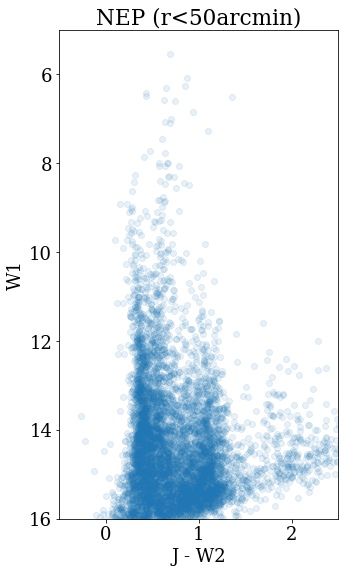

In [3]:
plt.figure(figsize=(5,9))
plt.scatter(NEP['j_m_2mass'] - NEP['w2mpro'], NEP['w1mpro'], alpha=0.1)
plt.xlim(-.5,2.5)
plt.ylim(16,5)
plt.xlabel('J - W2')
plt.ylabel('W1')
plt.title('NEP (r<50arcmin)')
plt.savefig('NEP_CMD.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

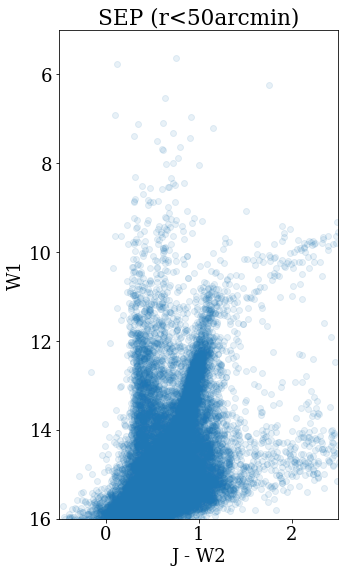

In [4]:
plt.figure(figsize=(5,9))
plt.scatter(SEP['j_m_2mass'] - SEP['w2mpro'], SEP['w1mpro'], alpha=0.1)
plt.xlim(-.5,2.5)
plt.ylim(16,5)
plt.xlabel('J - W2')
plt.ylabel('W1')
plt.title('SEP (r<50arcmin)')
plt.savefig('SEP_CMD.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

Text(0,0.5,'W1 - W2')

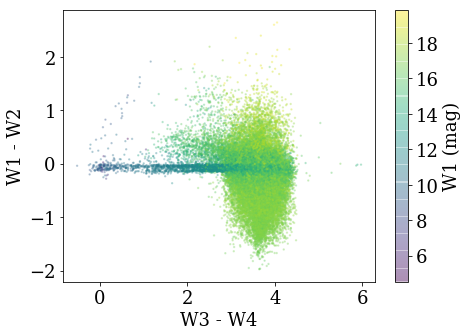

In [5]:
plt.figure(figsize=(7,5))

plt.scatter(SEP['w3mpro'] - SEP['w4mpro'], SEP['w1mpro'] - SEP['w2mpro'], alpha=0.25, s=2, c=SEP['w1mpro'])
cb= plt.colorbar()
cb.set_label('W1 (mag)')
plt.xlabel('W3 - W4')
plt.ylabel('W1 - W2')


Text(0,0.5,'W1 - W2')

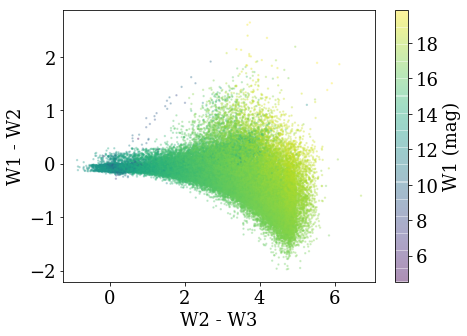

In [6]:
plt.figure(figsize=(7,5))

plt.scatter(SEP['w2mpro'] - SEP['w3mpro'], SEP['w1mpro'] - SEP['w2mpro'], alpha=0.25, s=2, c=SEP['w1mpro'])
cb= plt.colorbar()
cb.set_label('W1 (mag)')
plt.xlabel('W2 - W3')
plt.ylabel('W1 - W2')

Text(0,0.5,'J - W2')

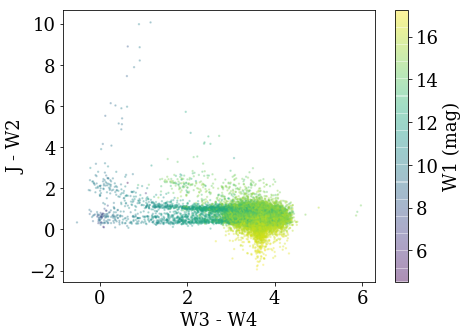

In [7]:
plt.figure(figsize=(7,5))

plt.scatter(SEP['w3mpro'] - SEP['w4mpro'], SEP['j_m_2mass'] - SEP['w2mpro'], alpha=0.25, s=2, c=SEP['w1mpro'])
cb= plt.colorbar()
cb.set_label('W1 (mag)')
plt.xlabel('W3 - W4')
plt.ylabel('J - W2')

Text(0,0.5,'J-H')

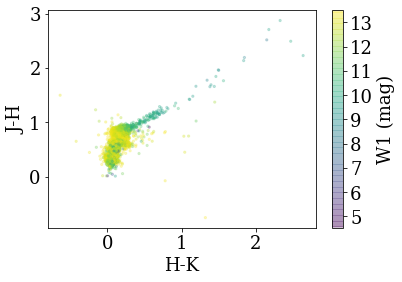

In [8]:
br = SEP['w1mpro'] < 13.5
plt.scatter(SEP['h_m_2mass'][br] - SEP['k_m_2mass'][br], SEP['j_m_2mass'][br] - SEP['h_m_2mass'][br],
            alpha=0.25, s=5, c=SEP['w1mpro'][br])
cb= plt.colorbar()
cb.set_label('W1 (mag)')
plt.xlabel('H-K')
plt.ylabel('J-H')

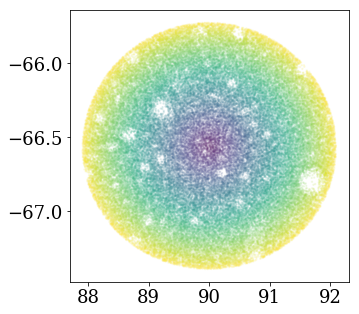

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(SEP['ra'], SEP['dec'], alpha=0.1, s=2, c=SEP['dist'], cmap=plt.cm.viridis)

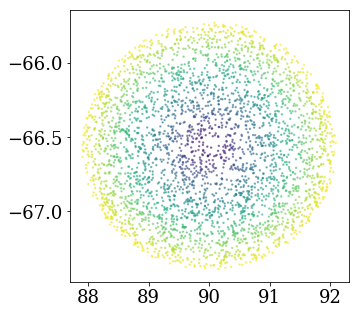

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(SEP['ra'][br], SEP['dec'][br], alpha=0.5, s=2, c=SEP['dist'][br], cmap=plt.cm.viridis)

## Sampling
Targets near the center can have as many as 20k visits over 6-7years

Targets at the edge of this field can have ~3k, still possibly interesting?

**Q:** What is the sampling density we need to do a useful, yet simple transit search?

In [11]:
# x = np.argmax(SEP['dist'])
# SEP['designation'][x]

######
# => 'J060559.74-655908.2'
# this furthest object from the field (50arcmin from SEP) still has many visits:
# 2663 + 330 + 0 + 519 = 3512

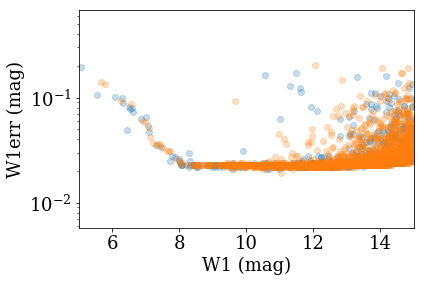

In [12]:
plt.scatter(NEP['w1mpro'], NEP['w1sigmpro'], alpha=0.25)
plt.scatter(SEP['w1mpro'], SEP['w1sigmpro'], alpha=0.25)

plt.xlabel('W1 (mag)')
plt.ylabel('W1err (mag)')
plt.xlim(5,15)
plt.yscale('log')

In [13]:
# how many stars are brighter than some W1 cutuff, and within the true Continuous Viewing Zone?
print(sum((NEP['w1mpro'] < 13) & (NEP['dist'] <= 23.5*60) & (NEP['w1mpro'] > 8)))
print(sum((SEP['w1mpro'] < 13) & (SEP['dist'] <= 23.5*60) & (SEP['w1mpro'] > 8)))

196
486


(-0.3, 0.3)

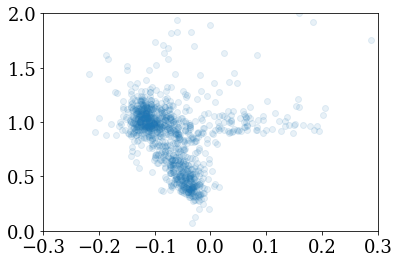

In [29]:
br = (SEP['w1mpro'] < 14) & (SEP['dist'] <= 23.5*60) & (SEP['w1mpro'] > 8)
plt.scatter(SEP['w1mpro'][br] - SEP['w2mpro'][br], SEP['j_m_2mass'][br] - SEP['w1mpro'][br], alpha=0.1)
plt.ylim(0,2)
plt.xlim(-.3,.3)


(-0.3, 0.3)

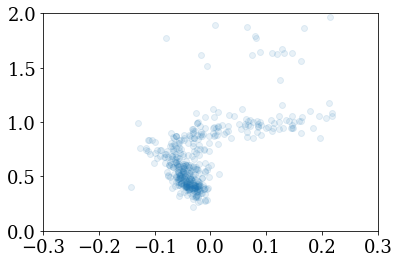

In [28]:
br = (NEP['w1mpro'] < 14) & (NEP['dist'] <= 23.5*60) & (NEP['w1mpro'] > 7.8)
plt.scatter(NEP['w1mpro'][br] - NEP['w2mpro'][br], NEP['j_m_2mass'][br] - NEP['w1mpro'][br], alpha=0.1)
plt.ylim(0,2)
plt.xlim(-.3,.3)



In [32]:
okN = ((NEP['w1mpro'] < 14.5) & (NEP['w1mpro'] > 7.8) & (NEP['dist'] <= 23.5*60) & 
       (NEP['j_m_2mass'] - NEP['w1mpro'] < 1.2) & (NEP['j_m_2mass'] - NEP['w1mpro'] > 0.75) & 
       (NEP['w1mpro'] - NEP['w2mpro'] > -0.03))
                
okS = ((SEP['w1mpro'] < 14.5) & (SEP['w1mpro'] > 7.8) & (SEP['dist'] <= 23.5*60) & 
       (SEP['j_m_2mass'] - SEP['w1mpro'] < 1.2) & (SEP['j_m_2mass'] - SEP['w1mpro'] > 0.75) & 
       (SEP['w1mpro'] - SEP['w2mpro'] > -0.03))

print(sum(okN), sum(okS))

152 157


In [36]:
# this is how you call to the GetData.WISE_LC function
'WISE ' + SEP['designation'][okS].values[0]

'WISE J060005.60-663224.5'